In [7]:
__author__ = 'Nishant'
import csv
import numpy as np
import matplotlib.pyplot as plt


measures=[]

def stats(reads):
    mu=sum(reads)/len(reads)
    sq=[x*x for x in reads]
    sig=sum(sq)/len(sq)-mu*mu
    return mu,sig

def read_data(name):
    k=int(int(name.split('_')[-1])/10)
    measures.append([[],0,0])
    with open(name+'.csv', newline='') as csvfile:
         spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
         spamreader=list(spamreader)
         for row in spamreader:
            if len(measures[k][0])>=1 and float(row[0])<=(measures[k][0][0]+100) and (float(row[0])>=measures[k][0][0]-100):
                measures[k][0].append(float(row[0]))
                measures[k][1]=(measures[k][1]*(max(len(measures[k][0])-1,1))+float(row[0]))/len(measures[k][0])
                measures[k][2]= (measures[k][2]*(max(len(measures[k][0])-1,1))+float(row[0])*float(row[0]))/len(measures[k][0])

            elif len(measures[k][0])==0:

                measures[k][0].append(float(row[0]))
                measures[k][1]=(measures[k][1]*(max(len(measures[k][0])-1,1))+float(row[0]))/len(measures[k][0])
                measures[k][2]= (measures[k][2]*(max(len(measures[k][0])-1,1))+float(row[0])*float(row[0]))/len(measures[k][0])



# Question 1
angles=range(0,360,10)
angles=["%03d"%x for x in angles]

for a in angles:
    read_data('LIDAR_100ms_Degrees_'+ a)

angs=[]
stds=[]
means=[]
for i in range(len(measures)):
    angs.append(float(i)*np.pi/18)
    mn,sd=stats(measures[i][0])
    means.append(mn)
    stds.append(np.sqrt(sd))
#For debugging
#print(means)
#print(stds)

# Explanation
The above code reads the data files and preprocesses them to consider relevant readings from the data. It also calculates the statistics of the data. 

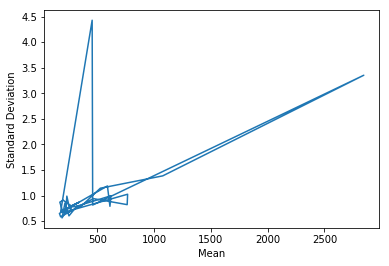

In [8]:
# Question 1a
plt.plot(means,stds)
plt.ylabel('Standard Deviation')
plt.xlabel('Mean')
plt.show()

# Question 1b
The above code plots the 2D plot of mean vs standard deviation. It can be seen from the plot that there is no apparent relation between mean and standard deviation. There are means for which the standard deviation overshoots more than usual. These might be far field measurements(prone to greater errors) or unusual geometry or surface being measured that might have caused greater uncertainty.

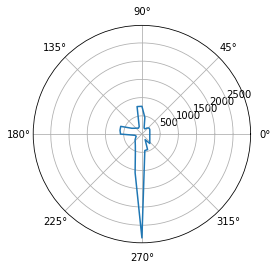

In [9]:
# Question 2
import matplotlib.pyplot as plt2
plt2.polar(angs,means)
plt2.show()

The above code plots the map of the room assuming the means of data from LIDAR to be the optimal estimates.